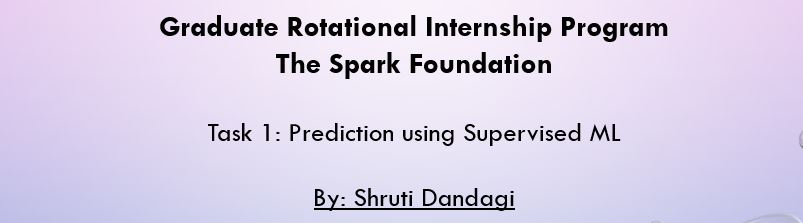

## <font color=blue>Problem Statement

- Predict the percentage of marks of a student based on the number of study hours. 
- What will be predicted score if a student studies for 9.25 hrs/ day.

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## <font color=blue>Reading and Inspection

In [1]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
# Reading the dataset into 'data' dataframe
data=pd.read_csv('http://bit.ly/w-data')
print("Dataset Imported Successfully")
data.head()

Dataset Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#summary of all the numeric columns in the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
##Determining the number of rows and columns
data.shape

(25, 2)

In [6]:
#Datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## <font color=blue>Data Visualization

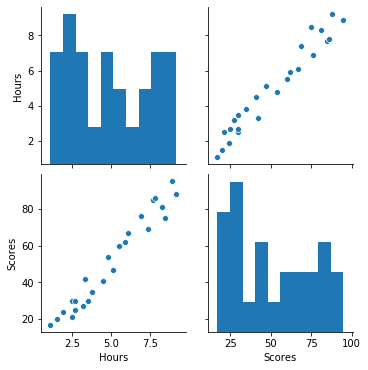

In [7]:
sns.pairplot(data,palette='cool')
plt.show()

#### <font color=green>**We see that there is linear relationship between 'Scores' and 'Hours'. So our assumption of Linearity for linear regession is verified.**

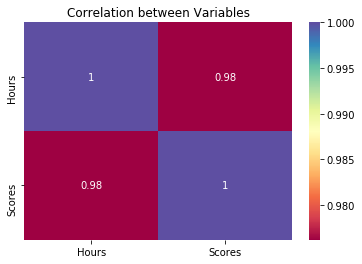

In [8]:
#Heatmap to see correlation between variables
sns.heatmap(data.corr(), cmap='Spectral', annot = True)
plt.title("Correlation between Variables")
plt.show()

#### <font color=green>There is a high correlation between Scores and Hours

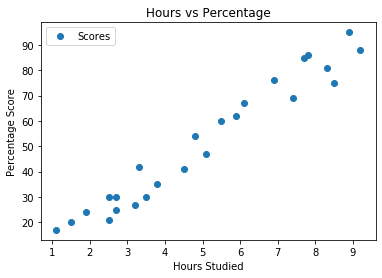

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### <font color=green>From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## <font color=blue>Data Preparation

### Dividing data into X and Y sets

We first assign the feature variable 'Hours' to the variable X and the response variable, Score, to the variable y

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

## <font color=blue>Model Building

### Splitting the Data into Training and Testing Sets

 We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [13]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lm.intercept_)
print(lm.coef_)


2.018160041434683
[9.91065648]


#### <font color=green>**So our Linear Regression Model equation is:**

$ Scores = 2.0181 + 9.91* Hours $

### Visualizing the actual datapoints and the fitted linear regression line

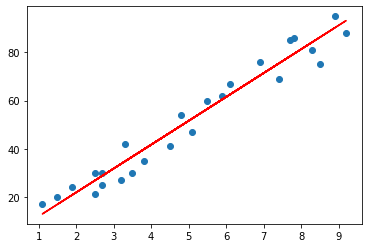

In [14]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,'r');
plt.show()

## <font color=blue> Making Predictions on the train data

Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = lm.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visualizing the fit on the test set

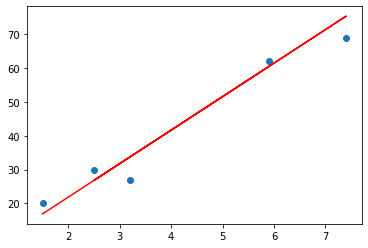

In [17]:
# Plotting the regression line
line = lm.coef_*X_test+lm.intercept_

# Plotting for the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, line,'r');
plt.show()

## <font color=blue> Model Evaluation

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
# i. Looking at the RMSE and MAE
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))

# ii. Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
print('R-Squared : ',r_squared)

# iii. Checking the Adjusted R-squared on the test set
n = X_test.shape[0]      # n is number of rows in X_test
p = X_test.shape[1]     # p= Number of features/predictors which is number of columns in X_test

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
print('Adjusted R- Squared : ',adjusted_r2)

Root Mean Squared Error :  4.6474476121003665
Mean Absolute Error :  4.183859899002975
R-Squared :  0.9454906892105356
Adjusted R- Squared :  0.9273209189473808


#### <font color=green>Looking at these metrics , we can say that our model is a good model as the R-Squared is equal to 94.5 % .

## <font color=blue>Testing with your own data

In [19]:
hours=9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## <font color="blue"/>Conclusion:

#### <font color='green'>If the student studies for 9.25 hours, the percentage score is predicted to be 93.69

## <font color="blue"/>Result

### <font color="green">From the Linear Regression Equation obtained we can see that if the study hours increases by one unit the percentage score  increases by 9.91 units.

Consider a scenario where we want to determine the linear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam. We want to find out that given the number of hours a student prepares for a test, about how high of a score can the student achieve?



Task #1: Predict the percentage of marks of a student based on the number of study hours using Supervised ML



Completed first task of The Sparks Foundation Data Science and Buisness Analytics Internship.



Github: https://github.com/ShrutiDandagi/GRIP--The-Spark-Foundation